In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
os.environ["KAGGLEHUB_CACHE"] = "/Volumes/SecureSSD/Projects/LearningML/kaggle"

In [2]:
dataset_slugs = {
    "Superstore Sales": ["ishanshrivastava28/superstore-sales", "Superstore.csv"],
    "Iris": ["uciml/iris", "Iris.csv"],
    "Titanic": ["heptapod/titanic", "train_and_test2.csv"],
    "Wine Quality": ["uciml/red-wine-quality-cortez-et-al-2009", "winequality-red.csv"],
    "Adult Census Income": ["uciml/adult-census-income", "adult.csv"],
    "Boston Housing": ["vikrishnan/boston-house-prices", "housing.csv"],
    "Breast Cancer Wisconsin Dataset": ["uciml/breast-cancer-wisconsin-data", "data.csv"],
    "Online Shoppers Purchasing Intention": ["imakash3011/online-shoppers-purchasing-intention-dataset", "online_shoppers_intention.csv"],
    "Bank Marketing": ["janiobachmann/bank-marketing-dataset", "bank.csv"],
    "Avocado Prices": ["neuromusic/avocado-prices", "avocado.csv"],
    "FIFA World Cup": ["evangower/fifa-world-cup", "worldcups.csv"],
    "New York City Airbnb Open Data": ["dgomonov/new-york-city-airbnb-open-data", "AB_NYC_2019.csv"],
    "World Happiness Report": ["unsdsn/world-happiness", "2015.csv"],
    "Stock Price": ["jillanisofttech/tesla-stock-price", "Tasla_Stock_Updated_V2.csv"],
    "Top Selling Book": ["sootersaalu/amazon-top-50-bestselling-books-2009-2019", "bestsellers with categories.csv"],
}

In [3]:
downloaded_paths = {}
for dataset, slug in dataset_slugs.items():
    try:
        path = kagglehub.dataset_download(slug[0])
        downloaded_paths[dataset] = path
    except Exception as e:
        None

100%|██████████| 1.80M/1.80M [00:01<00:00, 1.24MB/s]

Extracting files...


100%|██████████| 3.60k/3.60k [00:00<00:00, 1.50MB/s]

Extracting files...


100%|██████████| 10.8k/10.8k [00:00<00:00, 8.22MB/s]

Extracting files...


100%|██████████| 25.6k/25.6k [00:00<00:00, 469kB/s]

Extracting files...


100%|██████████| 450k/450k [00:01<00:00, 404kB/s]

Extracting files...


100%|██████████| 12.8k/12.8k [00:00<00:00, 8.02MB/s]

Extracting files...


100%|██████████| 48.6k/48.6k [00:00<00:00, 203kB/s]

Extracting files...


100%|██████████| 252k/252k [00:01<00:00, 220kB/s]

Extracting files...


100%|██████████| 142k/142k [00:00<00:00, 209kB/s]

Extracting files...


100%|██████████| 629k/629k [00:01<00:00, 524kB/s]

Extracting files...


100%|██████████| 15.4k/15.4k [00:00<00:00, 1.70MB/s]

Extracting files...


100%|██████████| 2.44M/2.44M [00:01<00:00, 1.47MB/s]

Extracting files...


100%|██████████| 36.8k/36.8k [00:00<00:00, 237kB/s]

Extracting files...


100%|██████████| 79.6k/79.6k [00:00<00:00, 200kB/s]

Extracting files...


100%|██████████| 14.5k/14.5k [00:00<00:00, 4.87MB/s]

Extracting files...


In [4]:
data_file_paths = {}

for dataset, path in downloaded_paths.items():
    main_data_file = os.path.join(path, dataset_slugs[dataset][1])
    data_file_paths[dataset] = main_data_file
    print(f"Identified main data file for '{dataset}': {main_data_file}")
print("\nSummary of Identified Data Files:")
print(data_file_paths)

Identified main data file for 'Superstore Sales': /Volumes/SecureSSD/Projects/LearningML/kaggle\datasets\ishanshrivastava28\superstore-sales\versions\1\Superstore.csv
Identified main data file for 'Iris': /Volumes/SecureSSD/Projects/LearningML/kaggle\datasets\uciml\iris\versions\2\Iris.csv
Identified main data file for 'Titanic': /Volumes/SecureSSD/Projects/LearningML/kaggle\datasets\heptapod\titanic\versions\1\train_and_test2.csv
Identified main data file for 'Wine Quality': /Volumes/SecureSSD/Projects/LearningML/kaggle\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2\winequality-red.csv
Identified main data file for 'Adult Census Income': /Volumes/SecureSSD/Projects/LearningML/kaggle\datasets\uciml\adult-census-income\versions\3\adult.csv
Identified main data file for 'Boston Housing': /Volumes/SecureSSD/Projects/LearningML/kaggle\datasets\vikrishnan\boston-house-prices\versions\1\housing.csv
Identified main data file for 'Breast Cancer Wisconsin Dataset': /Volumes/Secure

In [5]:
dataframes = {}
for dataset, file_path in data_file_paths.items():
    try:
        df_name = dataset.replace(' ', '_').replace('-', '_').lower() + '_df'
        df = pd.read_csv(file_path)
        dataframes[dataset] = df
    except Exception as e:
        None
for i, (dataset_name, df) in enumerate(dataframes.items()):
    globals()[f'df{i+1}'] = df
    print(f"'{dataset_name}' is now available as df{i+1}")

'Iris' is now available as df1
'Titanic' is now available as df2
'Wine Quality' is now available as df3
'Adult Census Income' is now available as df4
'Boston Housing' is now available as df5
'Breast Cancer Wisconsin Dataset' is now available as df6
'Online Shoppers Purchasing Intention' is now available as df7
'Bank Marketing' is now available as df8
'Avocado Prices' is now available as df9
'FIFA World Cup' is now available as df10
'New York City Airbnb Open Data' is now available as df11
'World Happiness Report' is now available as df12
'Stock Price' is now available as df13
'Top Selling Book' is now available as df14


In [6]:
print("Distribution of Iris Species:")
display(df1['Species'].value_counts())

petal_correlation = df1['PetalLengthCm'].corr(df1['PetalWidthCm'])
print(f"\nCorrelation between Petal Length and Petal Width: {petal_correlation:.2f}")

print("\nAverage Sepal Length by Species:")
display(df1.groupby('Species')['SepalLengthCm'].mean())

df1['PetalArea'] = df1['PetalLengthCm'] * df1['PetalWidthCm']
largest_petal_area_species = df1.loc[df1['PetalArea'].idxmax()]['Species']
print(f"\nSpecies with the largest petal area: {largest_petal_area_species}")

print("\nNumber of observations per species:")
display(df1['Species'].value_counts())

print("Distribution of Iris Species:")
display(df1['Species'].value_counts())

petal_correlation = df1['PetalLengthCm'].corr(df1['PetalWidthCm'])
print(f"\nCorrelation between Petal Length and Petal Width: {petal_correlation:.2f}")

print("\nAverage Sepal Length by Species:")
display(df1.groupby('Species')['SepalLengthCm'].mean())

df1['PetalArea'] = df1['PetalLengthCm'] * df1['PetalWidthCm']
largest_petal_area_species = df1.loc[df1['PetalArea'].idxmax()]['Species']
print(f"\nSpecies with the largest petal area: {largest_petal_area_species}")

print("\nNumber of observations per species:")
display(df1['Species'].value_counts())

Distribution of Iris Species:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


Correlation between Petal Length and Petal Width: 0.96

Average Sepal Length by Species:


Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64


Species with the largest petal area: Iris-virginica

Number of observations per species:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Distribution of Iris Species:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


Correlation between Petal Length and Petal Width: 0.96

Average Sepal Length by Species:


Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64


Species with the largest petal area: Iris-virginica

Number of observations per species:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Survival Rate: 0.26

Average Age of Passengers: 29.50

Proportion of Male and Female Passengers:


Sex
0    0.644003
1    0.355997
Name: proportion, dtype: float64


Survival Rate by Passenger Class:


Pclass
1    0.421053
2    0.314079
3    0.167842
Name: 2urvived, dtype: float64


Distribution of Fare Paid:


count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

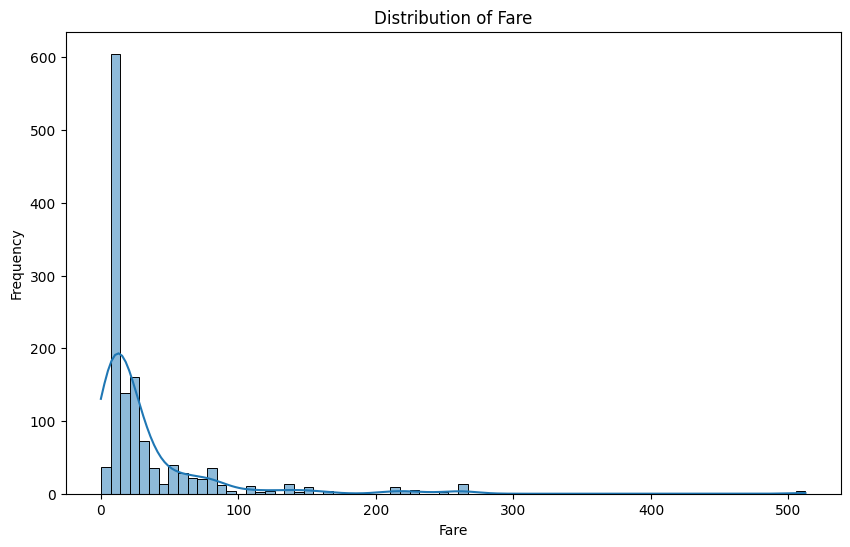

Survival Rate: 0.26


In [7]:
survival_rate = df2['2urvived'].mean()
print(f"Survival Rate: {survival_rate:.2f}")

average_age = df2['Age'].mean()
print(f"\nAverage Age of Passengers: {average_age:.2f}")

print("\nProportion of Male and Female Passengers:")
display(df2['Sex'].value_counts(normalize=True))

print("\nSurvival Rate by Passenger Class:")
display(df2.groupby('Pclass')['2urvived'].mean().sort_values(ascending=False))

print("\nDistribution of Fare Paid:")
display(df2['Fare'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df2['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

survival_rate = df2['2urvived'].mean()
print(f"Survival Rate: {survival_rate:.2f}")

Correlation between pH and Alcohol Content: 0.21

Median Quality Rating (Assuming Red Wine Dataset):


np.float64(6.0)


Median Volatile Acidity (Assuming Red Wine Dataset):


np.float64(0.52)


Proportion of Wine Types (Assuming Red Wine Dataset: 100% Red):
Red: 1.0

Distribution of Citric Acid (Assuming Red Wine Dataset):


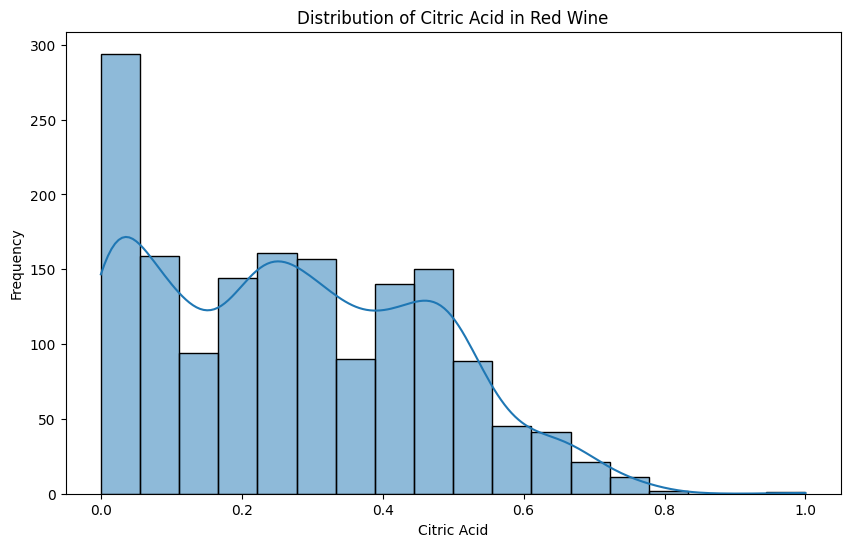

In [8]:
ph_alcohol_corr = df3['pH'].corr(df3['alcohol'])
print(f"Correlation between pH and Alcohol Content: {ph_alcohol_corr:.2f}")


print("\nMedian Quality Rating (Assuming Red Wine Dataset):")
display(df3['quality'].median())

print("\nMedian Volatile Acidity (Assuming Red Wine Dataset):")
display(df3['volatile acidity'].median())
print("\nProportion of Wine Types (Assuming Red Wine Dataset: 100% Red):")
print("Red: 1.0")



print("\nDistribution of Citric Acid (Assuming Red Wine Dataset):")
plt.figure(figsize=(10, 6))
sns.histplot(df3['citric acid'], kde=True)
plt.title('Distribution of Citric Acid in Red Wine')
plt.xlabel('Citric Acid')
plt.ylabel('Frequency')
plt.show()

In [9]:
income_proportion = df4['income'].value_counts(normalize=True)
print("Proportion of people earning >50K:")
display(income_proportion['>50K'])
average_age_over50k = df4[df4['income'] == '>50K']['age'].mean()
print(f"\nAverage age of people earning >50K: {average_age_over50k:.2f}")

age_education_corr = df4['age'].corr(df4['education.num'])
print(f"\nCorrelation between Age and Education Level: {age_education_corr:.2f}")

print("\nProportion of men and women earning >50K:")
display(df4[df4['income'] == '>50K']['sex'].value_counts(normalize=True))

median_hours_over50k = df4[df4['income'] == '>50K']['hours.per.week'].median()
print(f"\nMedian hours worked per week for people earning >50K: {median_hours_over50k:.2f}")

Proportion of people earning >50K:


np.float64(0.2408095574460244)


Average age of people earning >50K: 44.25

Correlation between Age and Education Level: 0.04

Proportion of men and women earning >50K:


sex
Male      0.849637
Female    0.150363
Name: proportion, dtype: float64


Median hours worked per week for people earning >50K: 40.00


Correlation between number of rooms and median home value: 0.70

Correlation with Median Home Value (MEDV):


C:\Users\Kishan Pawar\AppData\Local\Temp\ipykernel_10520\3172032453.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df5 = pd.read_csv(data_file_paths['Boston Housing'], delim_whitespace=True, names=column_names)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


Variable with the highest correlation with MEDV: RM

Average age of homes: 68.57

Distribution of Pupil-Teacher Ratio (PTRATIO):


count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

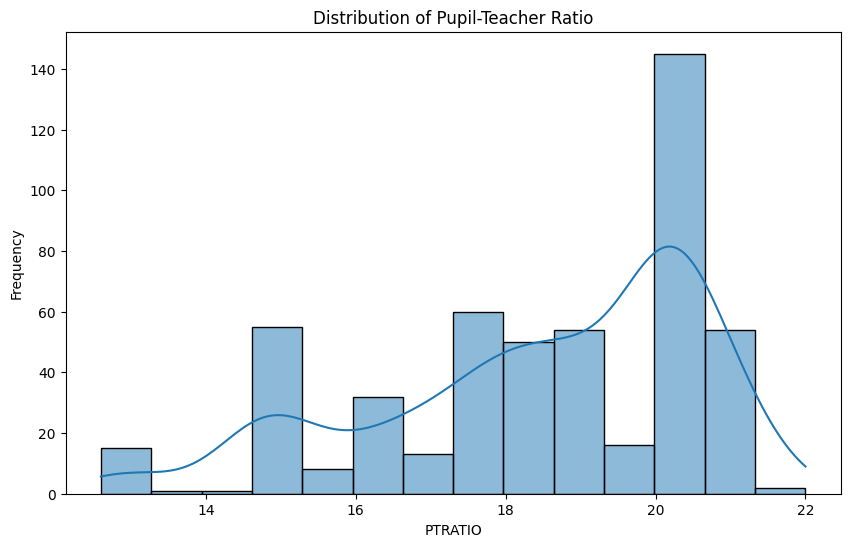


Row with the highest median home value (MEDV):


CRIM         1.46336
ZN           0.00000
INDUS       19.58000
CHAS         0.00000
NOX          0.60500
RM           7.48900
AGE         90.80000
DIS          1.97090
RAD          5.00000
TAX        403.00000
PTRATIO     14.70000
B          374.43000
LSTAT        1.73000
MEDV        50.00000
Name: 161, dtype: float64

In [10]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df5 = pd.read_csv(data_file_paths['Boston Housing'], delim_whitespace=True, names=column_names)

rm_medv_corr = df5['RM'].corr(df5['MEDV'])
print(f"Correlation between number of rooms and median home value: {rm_medv_corr:.2f}")

correlation_with_medv = df5.corr()['MEDV'].sort_values(ascending=False)
print("\nCorrelation with Median Home Value (MEDV):")
display(correlation_with_medv)
highest_corr_variable = correlation_with_medv.index[1] # Exclude MEDV itself
print(f"\nVariable with the highest correlation with MEDV: {highest_corr_variable}")

average_age_homes = df5['AGE'].mean()
print(f"\nAverage age of homes: {average_age_homes:.2f}")

print("\nDistribution of Pupil-Teacher Ratio (PTRATIO):")
display(df5['PTRATIO'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df5['PTRATIO'], kde=True)
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

print("\nRow with the highest median home value (MEDV):")
display(df5.loc[df5['MEDV'].idxmax()])

Proportion of Benign and Malignant Tumours:


diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


Correlation between tumour radius and perimeter: 1.00

Average smoothness of tumours: 0.10

Distribution of Tumour Concavity (concavity_mean):


count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64

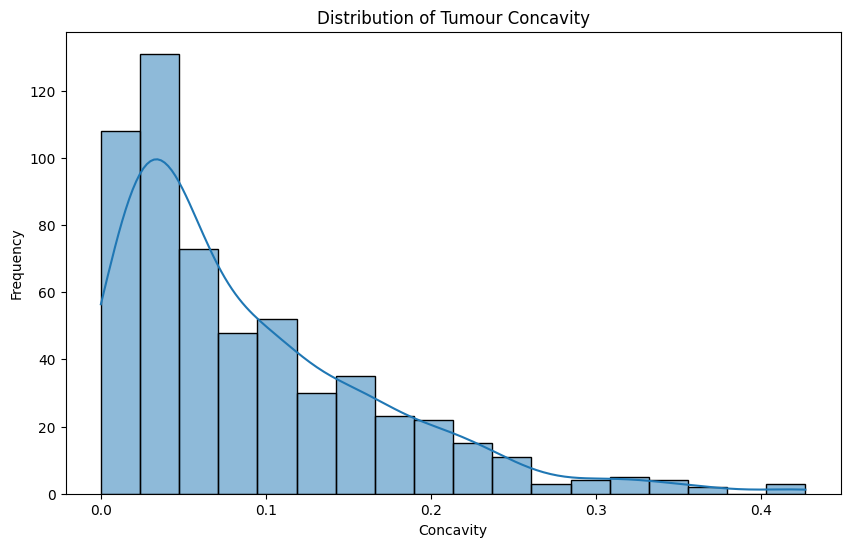


Median area of tumours: 551.10


In [11]:
print("Proportion of Benign and Malignant Tumours:")
display(df6['diagnosis'].value_counts(normalize=True))

radius_perimeter_corr = df6['radius_mean'].corr(df6['perimeter_mean'])
print(f"\nCorrelation between tumour radius and perimeter: {radius_perimeter_corr:.2f}")

average_smoothness = df6['smoothness_mean'].mean()
print(f"\nAverage smoothness of tumours: {average_smoothness:.2f}")

print("\nDistribution of Tumour Concavity (concavity_mean):")
display(df6['concavity_mean'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df6['concavity_mean'], kde=True)
plt.title('Distribution of Tumour Concavity')
plt.xlabel('Concavity')
plt.ylabel('Frequency')
plt.show()

median_area = df6['area_mean'].median()
print(f"\nMedian area of tumours: {median_area:.2f}")

Proportion of visitors who made a purchase:


np.float64(0.15474452554744525)


Distribution of the number of pages visited:


count    12330.000000
mean        34.550203
std         46.514053
min          0.000000
25%          8.000000
50%         20.000000
75%         42.000000
max        746.000000
Name: TotalPagesVisited, dtype: float64

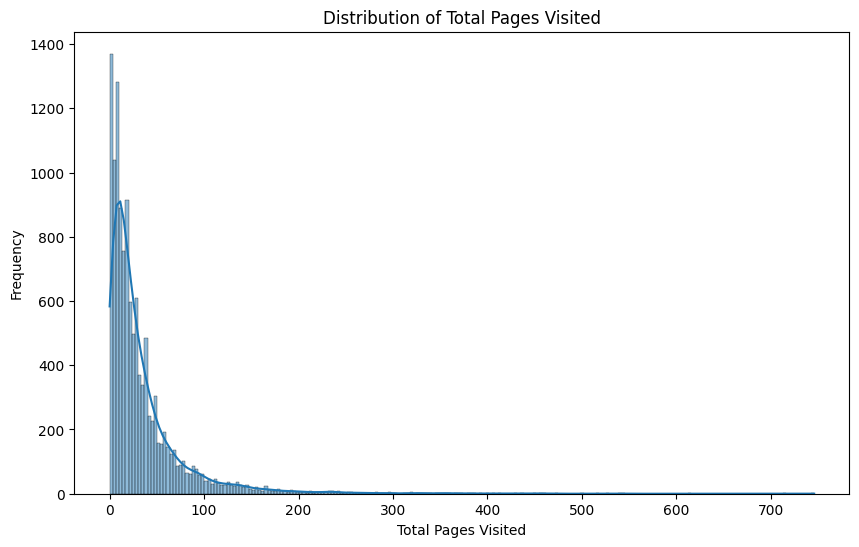


Average time spent on the website: 1310.04

Correlation between bounce rate and revenue: -0.15

Distribution of operating system used by visitors:


OperatingSystems
2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: proportion, dtype: float64

In [12]:
purchase_proportion = df7['Revenue'].value_counts(normalize=True)
print("Proportion of visitors who made a purchase:")
display(purchase_proportion[True])


df7['TotalPagesVisited'] = df7['ProductRelated'] + df7['Informational'] + df7['Administrative']
print("\nDistribution of the number of pages visited:")
display(df7['TotalPagesVisited'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df7['TotalPagesVisited'], kde=True)
plt.title('Distribution of Total Pages Visited')
plt.xlabel('Total Pages Visited')
plt.ylabel('Frequency')
plt.show()

df7['TotalDuration'] = df7['Administrative_Duration'] + df7['Informational_Duration'] + df7['ProductRelated_Duration']
average_time_spent = df7['TotalDuration'].mean()
print(f"\nAverage time spent on the website: {average_time_spent:.2f}")


df7['Revenue_numeric'] = df7['Revenue'].astype(int)
bounce_revenue_corr = df7['BounceRates'].corr(df7['Revenue_numeric'])
print(f"\nCorrelation between bounce rate and revenue: {bounce_revenue_corr:.2f}")


print("\nDistribution of operating system used by visitors:")
display(df7['OperatingSystems'].value_counts(normalize=True))

In [13]:
deposit_proportion = df8['deposit'].value_counts(normalize=True)
print("Proportion of people who subscribed to a term deposit:")
display(deposit_proportion['yes'])

age_balance_corr = df8['age'].corr(df8['balance'])
print(f"\nCorrelation between age and balance: {age_balance_corr:.2f}")

print("\nDistribution of job type of the customers:")
display(df8['job'].value_counts(normalize=True))

average_duration = df8['duration'].mean()
print(f"\nAverage duration of the calls: {average_duration:.2f}")

print("\nProportion of calls made each month:")
display(df8['month'].value_counts(normalize=True))

Proportion of people who subscribed to a term deposit:


np.float64(0.4738398136534671)


Correlation between age and balance: 0.11

Distribution of job type of the customers:


job
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: proportion, dtype: float64


Average duration of the calls: 371.99

Proportion of calls made each month:


month
may    0.253001
aug    0.136087
jul    0.135639
jun    0.109479
nov    0.084483
apr    0.082691
feb    0.069522
oct    0.035119
jan    0.030819
sep    0.028579
mar    0.024727
dec    0.009855
Name: proportion, dtype: float64

In [14]:
print(df10.info())
average_goals_per_game = df10['goals_scored'].sum() / df10['games'].sum()
print(f"Average number of goals scored per game: {average_goals_per_game:.2f}")
df10.head()

draw_proportion = df10['games'].mean()
print(f"\nProportion of games that ended in a draw: {draw_proportion:.2f}")



most_wins_team = df10['winner'].value_counts().idxmax()
print(f"Team with the most wins in this dataset: {most_wins_team}")


print("\nPlayer age information is not available in this dataset.")


print("\nAttendance information is not available in this dataset.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          21 non-null     int64 
 1   host          21 non-null     object
 2   winner        21 non-null     object
 3   second        21 non-null     object
 4   third         21 non-null     object
 5   fourth        21 non-null     object
 6   goals_scored  21 non-null     int64 
 7   teams         21 non-null     int64 
 8   games         21 non-null     int64 
 9   attendance    21 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.8+ KB
None
Average number of goals scored per game: 2.83

Proportion of games that ended in a draw: 42.86
Team with the most wins in this dataset: Brazil

Player age information is not available in this dataset.

Attendance information is not available in this dataset.


In [15]:

average_price = df11['price'].mean()
print(f"Average price of listings: {average_price:.2f}")


print("\nDistribution of room types:")
display(df11['room_type'].value_counts(normalize=True))


print("\nNeighbourhood with the most listings:")
display(df11['neighbourhood'].value_counts().head(1))

reviews_price_corr = df11['number_of_reviews'].corr(df11['price'])
print(f"\nCorrelation between number of reviews and price: {reviews_price_corr:.2f}")


print("\nCancellation policy information is not available in this dataset.")

Average price of listings: 152.72

Distribution of room types:


room_type
Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: proportion, dtype: float64


Neighbourhood with the most listings:


neighbourhood
Williamsburg    3920
Name: count, dtype: int64


Correlation between number of reviews and price: -0.05

Cancellation policy information is not available in this dataset.


Distribution of Happiness Scores:


count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

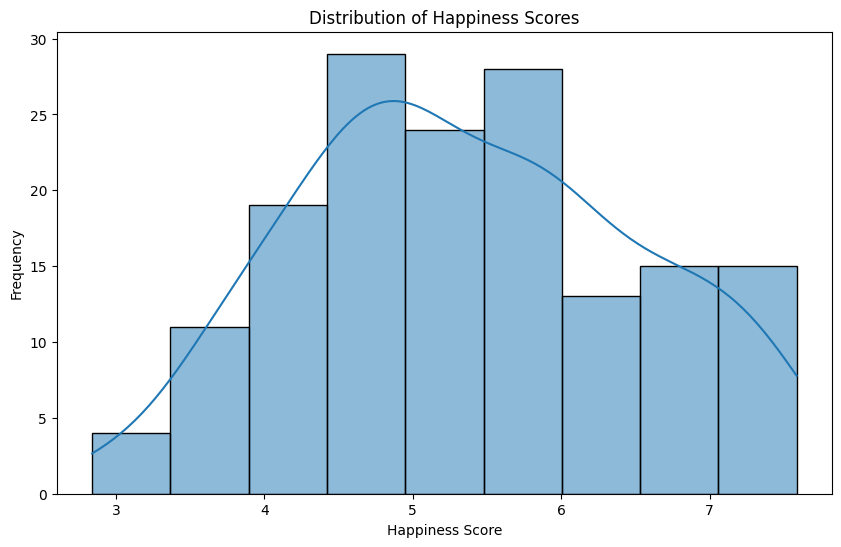


Country with the highest happiness score:


Country                             Switzerland
Region                           Western Europe
Happiness Rank                                1
Happiness Score                           7.587
Standard Error                          0.03411
Economy (GDP per Capita)                1.39651
Family                                  1.34951
Health (Life Expectancy)                0.94143
Freedom                                 0.66557
Trust (Government Corruption)           0.41978
Generosity                              0.29678
Dystopia Residual                       2.51738
Name: 0, dtype: object


Correlation between GDP per capita and happiness score: 0.78

Distribution of factors contributing to happiness:


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140



Region with the highest average happiness score:


Region
Australia and New Zealand    7.285
Name: Happiness Score, dtype: float64

In [16]:
print("Distribution of Happiness Scores:")
display(df12['Happiness Score'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df12['Happiness Score'], kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

highest_happiness_country = df12.loc[df12['Happiness Score'].idxmax()]
print("\nCountry with the highest happiness score:")
display(highest_happiness_country)

gdp_happiness_corr = df12['Economy (GDP per Capita)'].corr(df12['Happiness Score'])
print(f"\nCorrelation between GDP per capita and happiness score: {gdp_happiness_corr:.2f}")

happiness_factors = df12.drop(['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error'], axis=1)
print("\nDistribution of factors contributing to happiness:")
display(happiness_factors.describe())

print("\nRegion with the highest average happiness score:")
display(df12.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False).head(1))

Average daily return of the stock: 0.0018

Distribution of Daily Trading Volume:


count    2.274000e+03
mean     1.142089e+08
std      7.688430e+07
min      1.062000e+07
25%      6.637762e+07
50%      9.359855e+07
75%      1.338214e+08
max      9.140820e+08
Name: Volume, dtype: float64

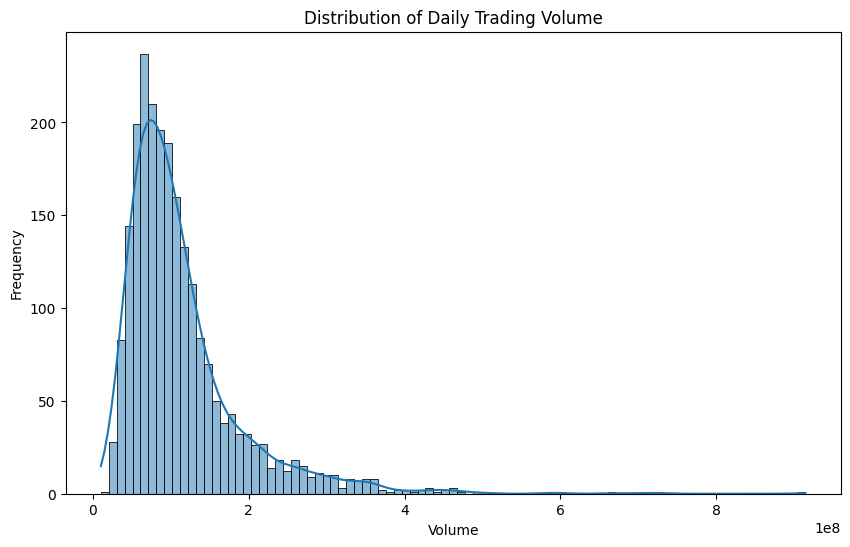

In [17]:
df13['Daily_Return'] = df13['Close'].pct_change()
average_daily_return = df13['Daily_Return'].mean()
print(f"Average daily return of the stock: {average_daily_return:.4f}")

print("\nDistribution of Daily Trading Volume:")
display(df13['Volume'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df13['Volume'], kde=True)
plt.title('Distribution of Daily Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

Average price of avocados: 1.41

Distribution of average price by region:


region
HartfordSpringfield    1.818639
SanFrancisco           1.804201
NewYork                1.727574
Philadelphia           1.632130
Sacramento             1.621568
Charlotte              1.606036
Northeast              1.601923
Albany                 1.561036
Chicago                1.556775
RaleighGreensboro      1.555118
BaltimoreWashington    1.534231
Boston                 1.530888
Syracuse               1.520325
BuffaloRochester       1.516834
HarrisburgScranton     1.513284
Jacksonville           1.510947
Orlando                1.506213
GrandRapids            1.505000
NorthernNewEngland     1.477396
Spokane                1.445592
Seattle                1.442574
Plains                 1.436509
StLouis                1.430621
MiamiFtLauderdale      1.428491
Tampa                  1.408846
Midsouth               1.404763
SouthCarolina          1.403284
SanDiego               1.398166
Southeast              1.398018
California             1.395325
LasVegas               1.380917
P


Region with the highest average price: HartfordSpringfield
Region with the lowest average price: Houston

Correlation between total volume and average price: -0.19

Distribution of total volume by year:


year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64

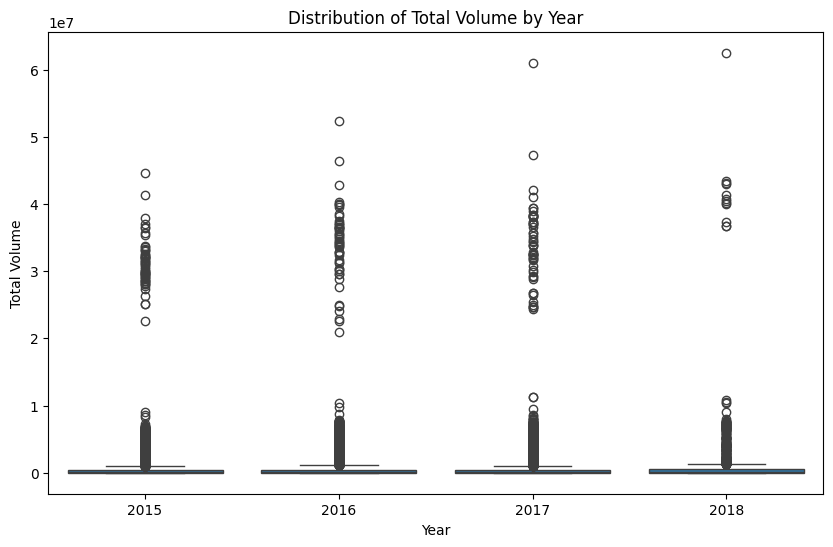

In [18]:
average_avocado_price = df9['AveragePrice'].mean()
print(f"Average price of avocados: {average_avocado_price:.2f}")

print("\nDistribution of average price by region:")
display(df9.groupby('region')['AveragePrice'].mean().sort_values(ascending=False))

average_price_by_region = df9.groupby('region')['AveragePrice'].mean()
highest_price_region = average_price_by_region.idxmax()
lowest_price_region = average_price_by_region.idxmin()
print(f"\nRegion with the highest average price: {highest_price_region}")
print(f"Region with the lowest average price: {lowest_price_region}")

total_volume_average_price_corr = df9['Total Volume'].corr(df9['AveragePrice'])
print(f"\nCorrelation between total volume and average price: {total_volume_average_price_corr:.2f}")

print("\nDistribution of total volume by year:")
display(df9.groupby('year')['Total Volume'].sum())

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='Total Volume', data=df9)
plt.title('Distribution of Total Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

1: 4.62
2


count      550.000000
mean     11953.281818
std      11731.132017
min         37.000000
25%       4058.000000
50%       8580.000000
75%      17253.250000
max      87841.000000
Name: Reviews, dtype: float64

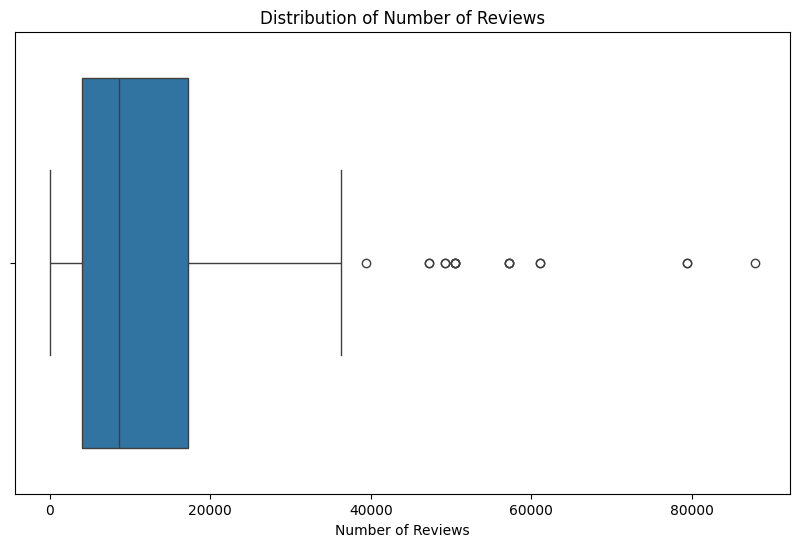


3


Name           Diagnostic and Statistical Manual of Mental Di...
Author                          American Psychiatric Association
User Rating                                                  4.5
Reviews                                                     6679
Price                                                        105
Year                                                        2013
Genre                                                Non Fiction
Name: 69, dtype: object


4 -0.13

5


Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

In [19]:
average_rating = df14['User Rating'].mean()
print(f"1: {average_rating:.2f}")

print(2)
display(df14['Reviews'].describe())


plt.figure(figsize=(10, 6))
sns.boxplot(x=df14['Reviews'])
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.show()

high = df14.loc[df14['Price'].idxmax()]
print("\n3")
display(high)

corr = df14['User Rating'].corr(df14['Price'])
print(f"\n4 {corr:.2f}")

print("\n5")
display(df14['Genre'].value_counts())